In [1]:
import pymdp
from pymdp.agent import Agent
import numpy as np

In [2]:
obs = [4] # 00, 01, 10, 11
num_obs_modalities = len(obs)

hidden_states = [2, 2]
num_hidden_state_factors = len(hidden_states)

actions = [0, 1]
num_actions_0 = 2
num_actions_1 = 1 # I do not control the state of the other agent

num_controls = [2, 1]
num_control_factors = len(num_controls)

In [3]:
A = pymdp.utils.obj_array(num_obs_modalities)
A_0 = np.zeros( (obs[0], hidden_states[0], hidden_states[1]) )
A_0[0, 0, 0] = 1
A_0[1, 0, 1] = 1
A_0[2, 1, 0] = 1
A_0[3, 1, 1] = 1
A[0] = A_0

In [4]:
B = pymdp.utils.initialize_empty_B(hidden_states, num_controls)
B_0 = np.zeros( (hidden_states[0], hidden_states[0], num_actions_0) )
B_1 = np.zeros( (hidden_states[1], hidden_states[1], num_actions_1) )
B[0][0, 0, 0] = 1
B[0][0, 1, 0] = 1
B[0][1, 0, 1] = 1
B[0][1, 1, 1] = 1
B[1][:, :, :] = 0.5

In [5]:
C = pymdp.utils.obj_array(num_obs_modalities)
C_0 = np.array([1, -10, -10, 1])
C[0] = C_0

In [6]:
D = pymdp.utils.obj_array(num_hidden_state_factors)
D_0 = np.array([0, 1.0])
D_1 = np.array([0, 1.0])
D[0] = D_0
D[1] = D_1

### E Vector

In [49]:
from env import SingleDeterministic

In [50]:
env = SingleDeterministic(init_state=[1, 1], fixed_policy=1)

Starting at state [1, 1], fixed second agent with policy 1


In [51]:
from actinf import actinf_loop

In [61]:
agent = Agent(A=A, B=B, C=C, D=D, num_controls=num_controls, policy_len=10)

In [62]:
agent.E

array([0.00097656, 0.00097656, 0.00097656, ..., 0.00097656, 0.00097656,
       0.00097656])

Environment reset
Time: 0. Agent receives observation: [3]
belief: [array([1.e-32, 1.e+00]) array([1.e-32, 1.e+00])]


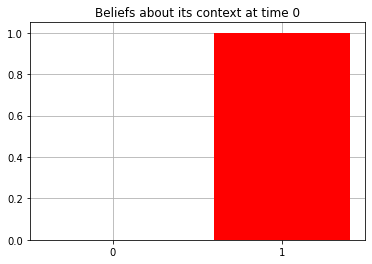

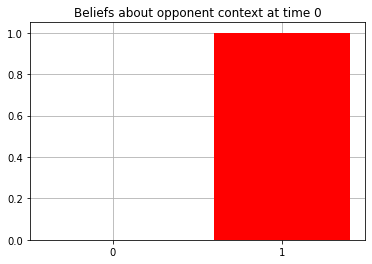

Agent chose action: [0. 0.]
New state: [0, 1]
Time: 1. Agent receives observation: [1]
belief: [array([1.00000000e+00, 1.00000037e-32]) array([1.e-16, 1.e+00])]


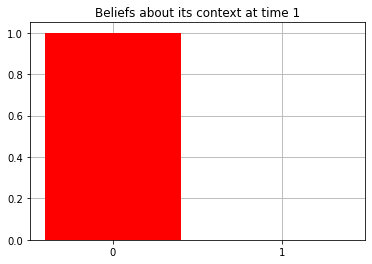

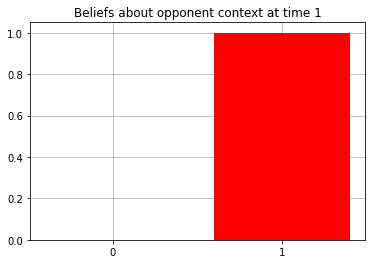

Agent chose action: [0. 0.]
New state: [0, 1]
Time: 2. Agent receives observation: [1]
belief: [array([1.00000000e+00, 1.00000037e-32]) array([1.e-16, 1.e+00])]


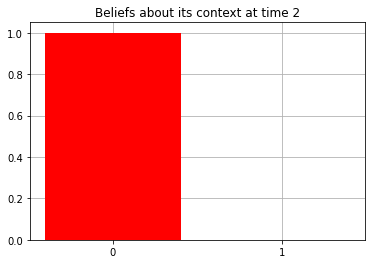

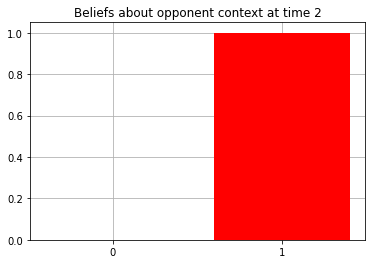

Agent chose action: [0. 0.]
New state: [0, 1]
Time: 3. Agent receives observation: [1]
belief: [array([1.00000000e+00, 1.00000037e-32]) array([1.e-16, 1.e+00])]


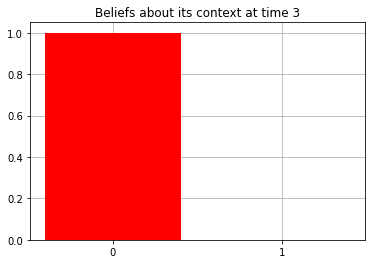

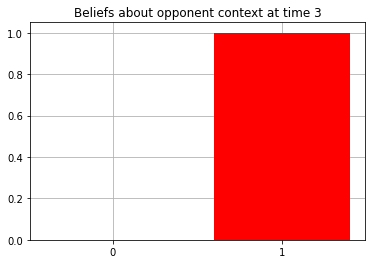

Agent chose action: [0. 0.]
New state: [0, 1]
Time: 4. Agent receives observation: [1]
belief: [array([1.00000000e+00, 1.00000037e-32]) array([1.e-16, 1.e+00])]


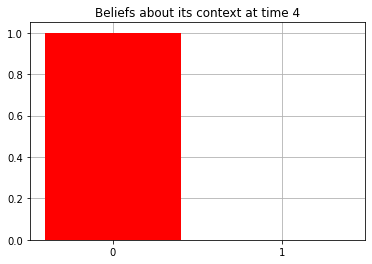

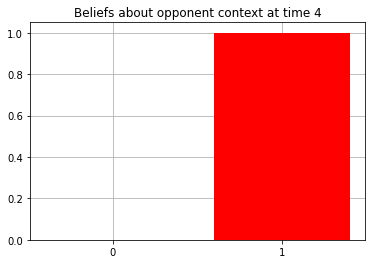

Agent chose action: [0. 0.]
New state: [0, 1]
Time: 5. Agent receives observation: [1]
belief: [array([1.00000000e+00, 1.00000037e-32]) array([1.e-16, 1.e+00])]


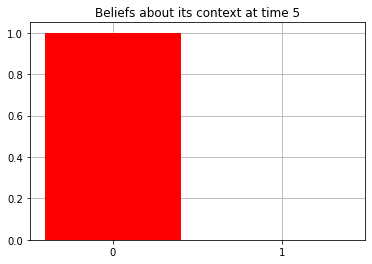

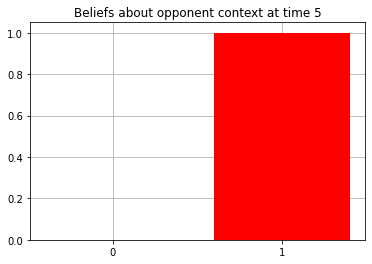

Agent chose action: [0. 0.]
New state: [0, 1]
Time: 6. Agent receives observation: [1]
belief: [array([1.00000000e+00, 1.00000037e-32]) array([1.e-16, 1.e+00])]


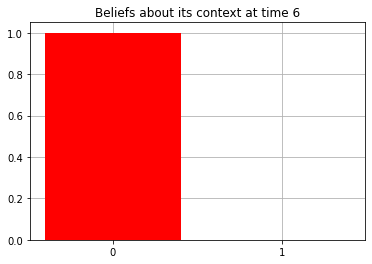

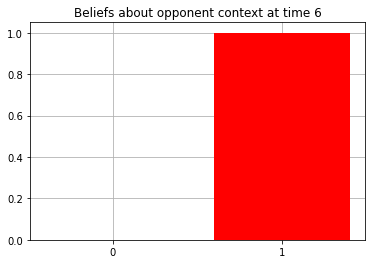

Agent chose action: [0. 0.]
New state: [0, 1]
Time: 7. Agent receives observation: [1]
belief: [array([1.00000000e+00, 1.00000037e-32]) array([1.e-16, 1.e+00])]


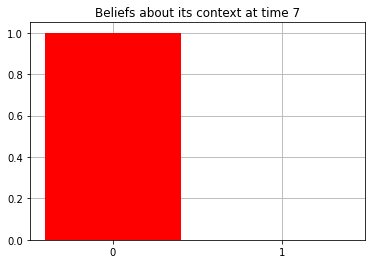

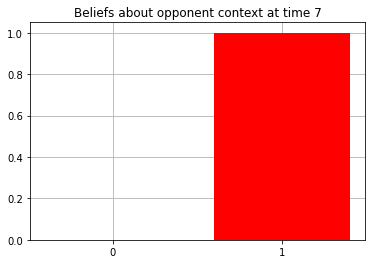

Agent chose action: [0. 0.]
New state: [0, 1]
Time: 8. Agent receives observation: [1]
belief: [array([1.00000000e+00, 1.00000037e-32]) array([1.e-16, 1.e+00])]


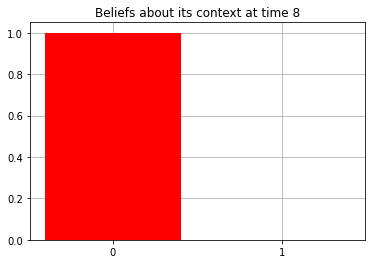

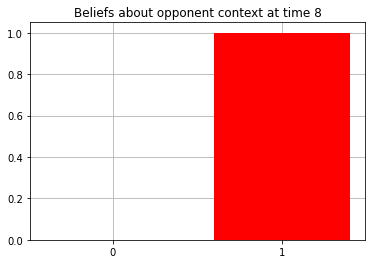

Agent chose action: [0. 0.]
New state: [0, 1]
Time: 9. Agent receives observation: [1]
belief: [array([1.00000000e+00, 1.00000037e-32]) array([1.e-16, 1.e+00])]


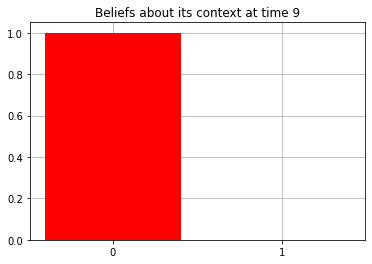

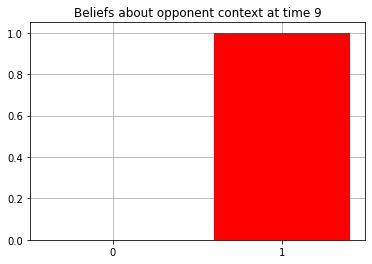

Agent chose action: [0. 0.]
New state: [0, 1]


In [63]:
actinf_loop(agent, env, 10)